In [5]:
# Hierarchical Clustering

## Sample-to-sample clustering
## Sample-to-gene clustering

In [6]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.patches import Patch
from scipy.cluster.hierarchy import linkage, dendrogram

In [7]:
# Remove warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
# Load Raw Read Counts and Differential Expression Results
read_counts = pd.read_csv("filtered_read_counts.csv", index_col=0)
de_results = pd.read_csv("sigs_expreesed_genes_alternaria_14dpi.csv", index_col=0)

In [9]:
read_counts.head()

,Alternaria_T14_1,Alternaria_T14_2,Alternaria_T14_3,Control_T14_1,Control_T14_2,Control_T14_3,Control_T14_4
Geneid,,,,,,,
AA0117_g585,0,4,16,0,0,0,0
AA0117_g1326,43,36,123,0,0,0,0
AA0117_g507,19,8,44,2,0,0,0
AA0117_g1239,0,4,16,0,0,0,0
AA0117_g1551,18,12,8,0,0,0,0


In [10]:
read_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5837 entries, AA0117_g585 to AA0117_g13533
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Alternaria_T14_1  5837 non-null   int64
 1   Alternaria_T14_2  5837 non-null   int64
 2   Alternaria_T14_3  5837 non-null   int64
 3   Control_T14_1     5837 non-null   int64
 4   Control_T14_2     5837 non-null   int64
 5   Control_T14_3     5837 non-null   int64
 6   Control_T14_4     5837 non-null   int64
dtypes: int64(7)
memory usage: 364.8+ KB


In [11]:
# Smaple-to-sample clustering

In [12]:
# Delete rows if the sum is < 10 across samples
data = read_counts[read_counts.sum(axis = 1) > 10]
data

,Alternaria_T14_1,Alternaria_T14_2,Alternaria_T14_3,Control_T14_1,Control_T14_2,Control_T14_3,Control_T14_4
Geneid,,,,,,,
AA0117_g585,0,4,16,0,0,0,0
AA0117_g1326,43,36,123,0,0,0,0
AA0117_g507,19,8,44,2,0,0,0
AA0117_g1239,0,4,16,0,0,0,0
AA0117_g1551,18,12,8,0,0,0,0
...,...,...,...,...,...,...,...
AA0117_g13312,6,9,31,0,0,0,0
AA0117_g13343,10,0,13,0,0,0,0
AA0117_g13357,4,5,7,0,0,0,0


In [13]:
# Normalize Read Counts using CPM and Log2 Transformation
def normalize_counts_cpm(df):
  
    # Compute CPM: (read count / total reads per sample) * 1,000,000
    cpm = df.div(df.sum(axis=0), axis=1) * 1e6
    # Apply log2 transformation (adding 1 to avoid log(0))
    log_cpm = np.log2(cpm + 1)
    return log_cpm

In [14]:
# Apply normalization
normalized_counts = normalize_counts_cpm(data)

In [15]:
# Compute the correlation matrix
correlation_matrix = normalized_counts.corr()

In [16]:
# Define condition labels and their colors
conditions = ['Alternaria'] * 3 + ['Control'] * 4
condition_colors = {'Alternaria': 'lightcoral', 'Control': 'lightblue'}
row_colors = [condition_colors[cond] for cond in conditions]

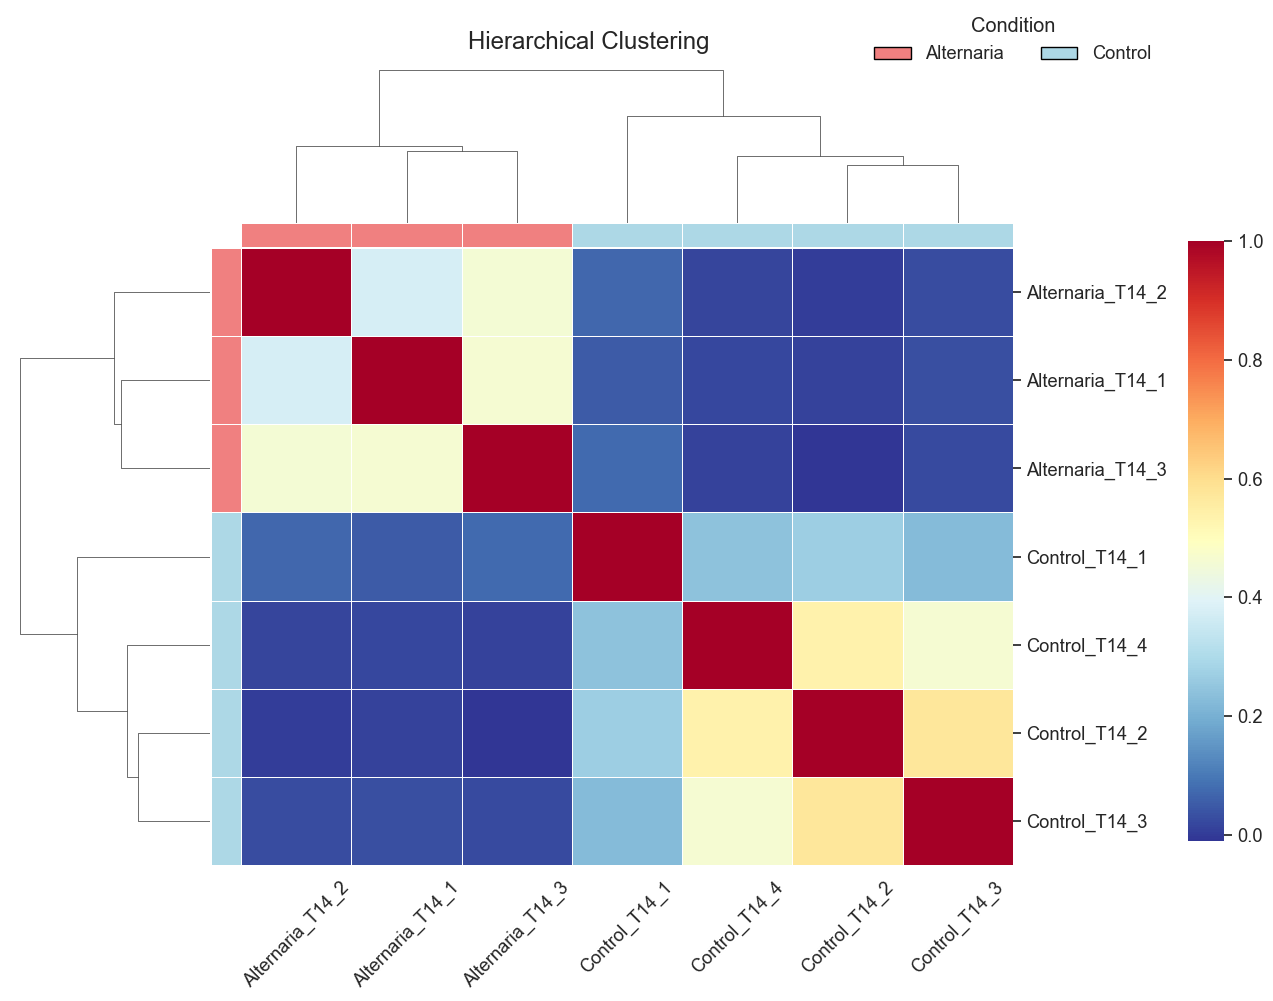

In [17]:
# Generate cluster map
sns.set(font_scale=1.2)  # Adjust font size for readability
g = sns.clustermap(
    correlation_matrix,
    cmap='RdYlBu_r',  # Heatmap color scheme YlOrRd
    linewidths=0.5,
    figsize=(12, 10),  # Adjust figure size
    annot=False,  # Set True for cell annotations
    cbar_kws={"label": ""},  # Adjust color bar label
    row_cluster=True,
    col_cluster=True,
    row_colors=row_colors,  # Add condition-based colors
    col_colors=row_colors,  # Add condition-based colors
    cbar_pos=(1, 0.2, 0.03, 0.6)  # Position color bar at the right
)

# Create a custom legend for conditions
legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=label)
    for label, color in condition_colors.items()
]
g.ax_heatmap.legend(
    handles=legend_elements,
    title="Condition",
    loc="upper center",
    bbox_to_anchor=(1, 1.40), #0.5, 1.15
    ncol=2,  # Display legend in a single row
    frameon=False
)

# label rotation
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)  # Keep y-axis labels horizontal
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)  # Rotate x-axis labels

g.fig.suptitle("Hierarchical Clustering", y=1.01)
g.savefig('sample_to_sample_HC_alternaria_14dpi.png', dpi=600, bbox_inches="tight")
plt.show()

In [18]:
# Gene-to-sample clustering

In [19]:
de_results.head(3)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
AA0117_g1326,17.557861,7.364455,1.897538,3.881057,0.000104,0.000886
AA0117_g510,10.128432,6.570855,2.045535,3.212292,0.001317,0.005108
AA0117_g1759,10.614220,6.638520,1.918973,3.459412,0.000541,0.002890


In [20]:
# Identify Top 10 Significant Genes
# Sort by adjusted p-value
top_genes = de_results.sort_values(by="padj").head(10).index.tolist()

In [21]:
top_genes

['AA0117_g5113',
 'AA0117_g7114',
 'AA0117_g2788',
 'AA0117_g5843',
 'AA0117_g10274',
 'AA0117_g5152',
 'AA0117_g8035',
 'AA0117_g11377',
 'AA0117_g5689',
 'AA0117_g728']

In [22]:
# Extract Data for Heatmap
# Subset normalized counts for the top 10 significant genes

df_subset = normalized_counts.loc[top_genes]

In [23]:
df_subset.head()

,Alternaria_T14_1,Alternaria_T14_2,Alternaria_T14_3,Control_T14_1,Control_T14_2,Control_T14_3,Control_T14_4
Geneid,,,,,,,
AA0117_g5113,13.337853,13.466839,13.436061,13.273503,0.000000,0.000000,0.000000
AA0117_g7114,12.336335,12.685571,12.625439,14.858368,0.000000,0.000000,0.000000
AA0117_g2788,11.299677,11.552566,11.266592,14.273430,0.000000,0.000000,0.000000
AA0117_g5843,10.572132,10.938474,10.889948,12.273648,14.802336,14.931615,14.646223
AA0117_g10274,11.087547,10.553046,10.951448,13.273503,0.000000,14.931615,0.000000


In [24]:
# Top 10 significantly expressed genes

linkage_rows = linkage(df_subset, method='average', metric='euclidean')  # Cluster rows
linkage_cols = linkage(df_subset.T, method='average', metric='euclidean')  # Cluster columns

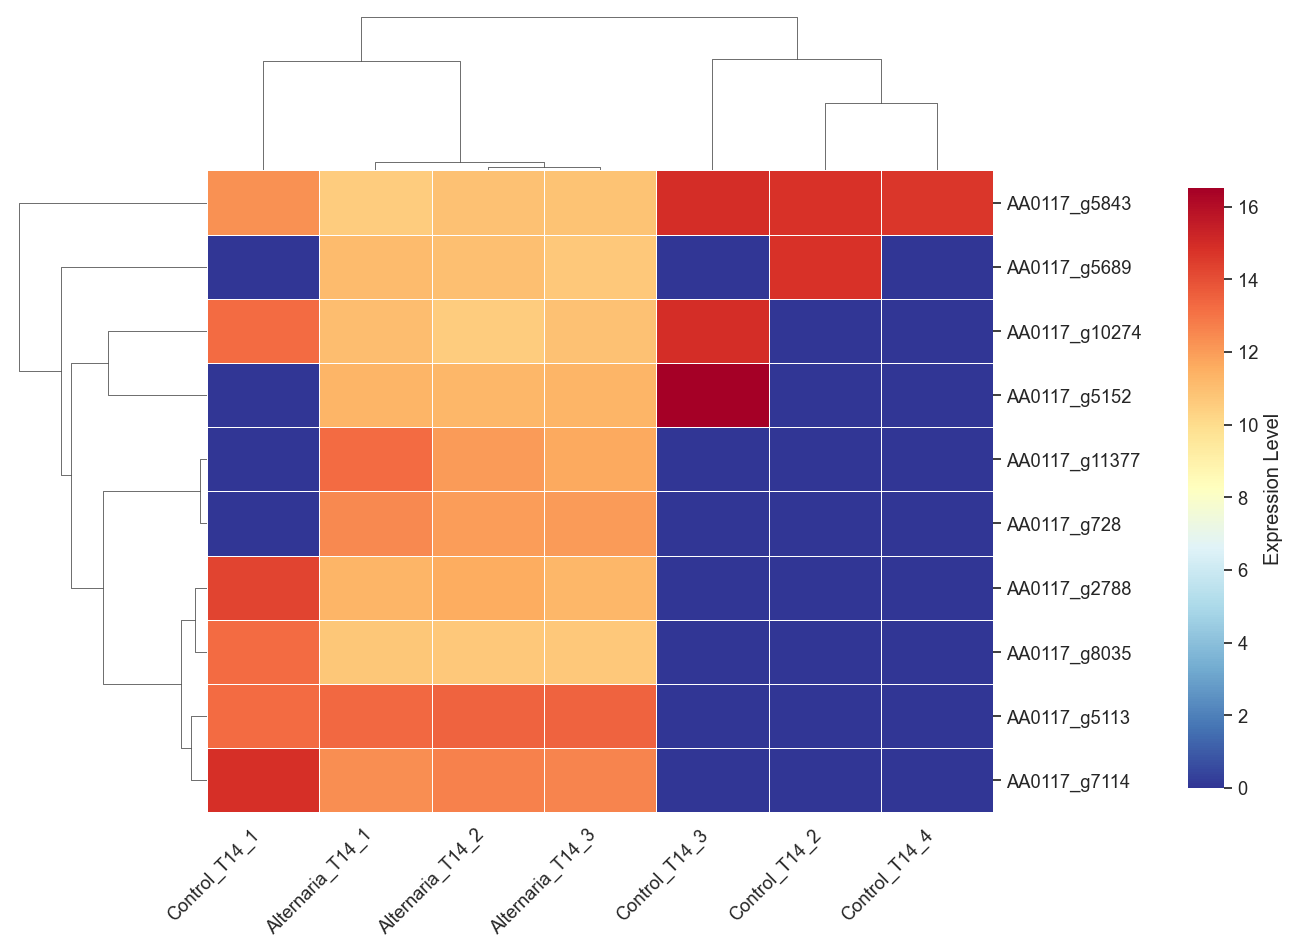

In [25]:
# Set seaborn font scale for readability
sns.set(font_scale=1.2)

# Generate cluster map with adjusted color bar height
g = sns.clustermap(
    df_subset,
    row_linkage=linkage_rows,
    col_linkage=linkage_cols,
    cmap="RdYlBu_r",  
    linewidths=0.5,
    figsize=(12, 10),
    cbar_kws={"label": "Expression Level"},
    cbar_pos=(1, 0.2, 0.03, 0.6)  # Adjusted to match heatmap height
)

# Customize heatmap labels
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, ha="right")  # Rotate x-axis labels
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)  # Keep y-axis labels horizontal

# Remove y-axis label name
g.ax_heatmap.set_ylabel("")

# Save figure with high resolution
plt.savefig("Gene_to_sample_HC_alternaria_14dpi.png", dpi=600, bbox_inches="tight")

plt.show()

In [26]:
read_counts.head()

,Alternaria_T14_1,Alternaria_T14_2,Alternaria_T14_3,Control_T14_1,Control_T14_2,Control_T14_3,Control_T14_4
Geneid,,,,,,,
AA0117_g585,0,4,16,0,0,0,0
AA0117_g1326,43,36,123,0,0,0,0
AA0117_g507,19,8,44,2,0,0,0
AA0117_g1239,0,4,16,0,0,0,0
AA0117_g1551,18,12,8,0,0,0,0


In [27]:
top_genes

['AA0117_g5113',
 'AA0117_g7114',
 'AA0117_g2788',
 'AA0117_g5843',
 'AA0117_g10274',
 'AA0117_g5152',
 'AA0117_g8035',
 'AA0117_g11377',
 'AA0117_g5689',
 'AA0117_g728']

In [28]:
print(read_counts.loc["AA0117_g5843"])  # Replace with an actual gene ID

Alternaria_T14_1    128
Alternaria_T14_2    162
Alternaria_T14_3    459
Control_T14_1         1
Control_T14_2         1
Control_T14_3         1
Control_T14_4         1
Name: AA0117_g5843, dtype: int64


In [29]:
# Identify Top 10 Significant Genes
# Sort by adjusted p-value
top_genes_log = de_results.sort_values(by="log2FoldChange").head(10)

In [30]:
top_genes_log

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
AA0117_g10040,24.245950,4.488244,1.296724,3.461217,5.377392e-04,0.002884
AA0117_g3918,27.754873,4.695115,1.314909,3.570676,3.560613e-04,0.002125
AA0117_g3987,22.756730,4.809839,1.301575,3.695399,2.195418e-04,0.001526
AA0117_g3031,16.748575,4.917307,1.170610,4.200635,2.661675e-05,0.000366
AA0117_g7830,10.475136,5.153290,1.539579,3.347208,8.162999e-04,0.003747
AA0117_g274,6.441968,5.160650,1.654311,3.119517,1.811480e-03,0.006240
AA0117_g2470,11.107220,5.242671,1.400473,3.743500,1.814749e-04,0.001333
AA0117_g320,20.831267,5.268606,1.075923,4.896823,9.739844e-07,0.000044
AA0117_g6008,22.029983,5.337069,1.269341,4.204598,2.615469e-05,0.000361
